In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [114]:
basic_details = pd.read_csv("/content/drive/MyDrive/Assesment dataset/leads_basic_details.csv")
demo_watched = pd.read_csv("/content/drive/MyDrive/Assesment dataset/leads_demo_watched_details.csv")
interaction = pd.read_csv("/content/drive/MyDrive/Assesment dataset/leads_interaction_details.csv")
reasons_for_no_interest = pd.read_csv("/content/drive/MyDrive/Assesment dataset/leads_reasons_for_no_interest.csv")
sales_managers_assigned = pd.read_csv("/content/drive/MyDrive/Assesment dataset/sales_managers_assigned_leads_details.csv")

In [107]:
print(basic_details.info())
print("\n",basic_details.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB
None

               age
count  360.000000
mean    21.561111
std     11.555444
min     16.000000
25%     18.000000
50%     21.000000
75%     24.000000
max    211.000000


Text(0.5, 0, 'Age')

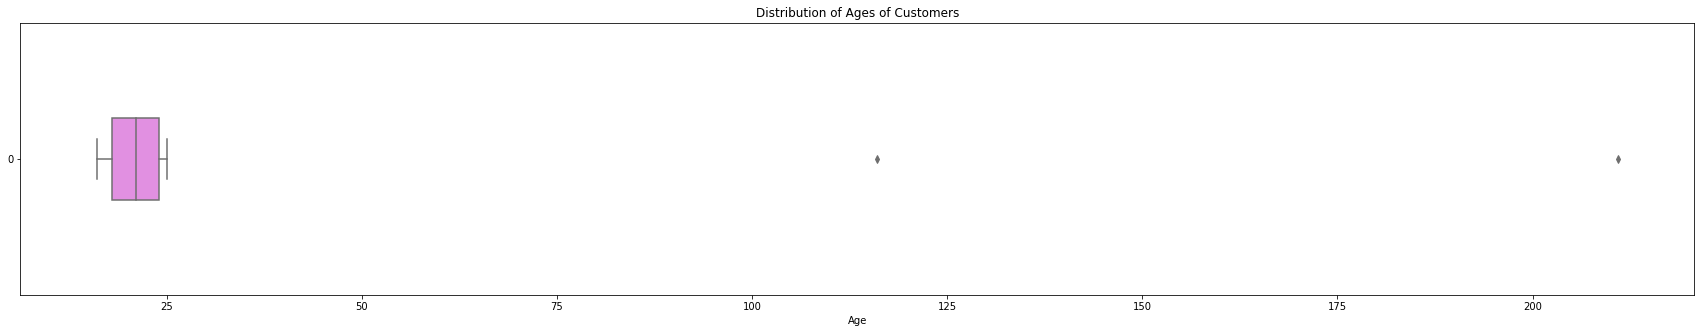

In [106]:
plt.figure(figsize=(30,5))
sns.boxplot(data=basic_details["age"], orient="horizontal", width=0.3, color="violet",)
plt.title("Distribution of Ages of Customers")
plt.xlabel("Age")

**There are two outliers age which are greater than 120 so we can drop them and remaining age group is between 16 to 30**

In [115]:
basic_details = basic_details[basic_details["age"]<70]
basic_details.shape

(358, 7)

In [108]:
print(demo_watched.info())
print("\n",demo_watched.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB
None

        watched_percentage
count          194.000000
mean            56.634021
std             43.555635
min              2.000000
25%             35.000000
50%             55.500000
75%             75.750000
max            510.000000


Text(0.5, 0, 'Demo watched percentage')

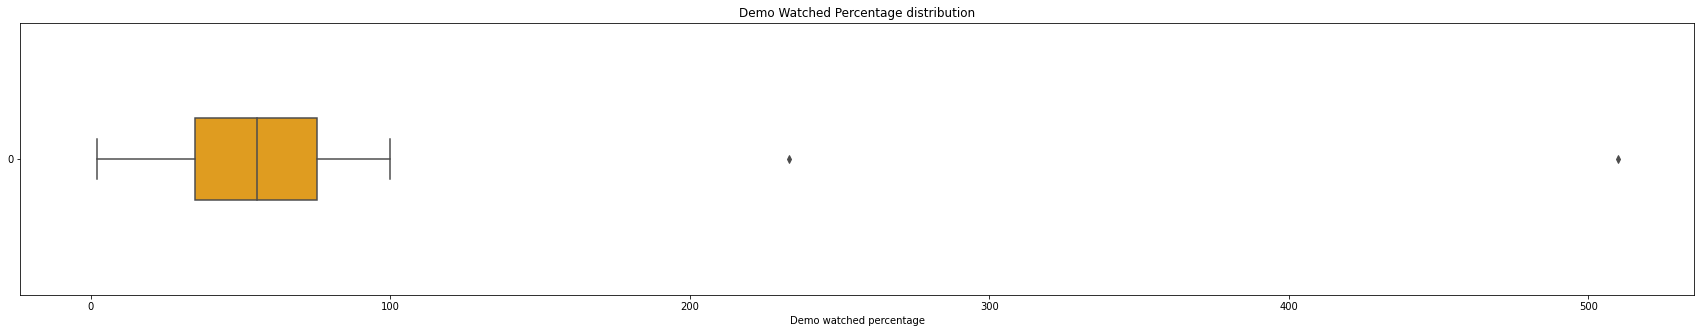

In [111]:
plt.figure(figsize=(30,5))
sns.boxplot(data=demo_watched["watched_percentage"], orient="horizontal", width=0.3, color="orange")
plt.title("Demo Watched Percentage distribution")
plt.xlabel("Demo watched percentage")

**Again Percentage cannot Exceed 100 so we will exclude those outliers**

In [116]:
demo_watched = demo_watched[demo_watched["watched_percentage"]<=100]
demo_watched.shape

(192, 4)

In [117]:
interaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [119]:
reasons_for_no_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


**we can see lot of null values in reasons table but those are not null values those are the customers who dropped the course lead    
for eg.
If some user drops after lead stage then he/she wont be present in next stage i.e. Awareness state**

In [120]:
sales_managers_assigned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


In [8]:
interaction[interaction['call_reason']=='followup_for_conversion']["call_status"].value_counts()

successful      169
unsuccessful     20
Name: call_status, dtype: int64

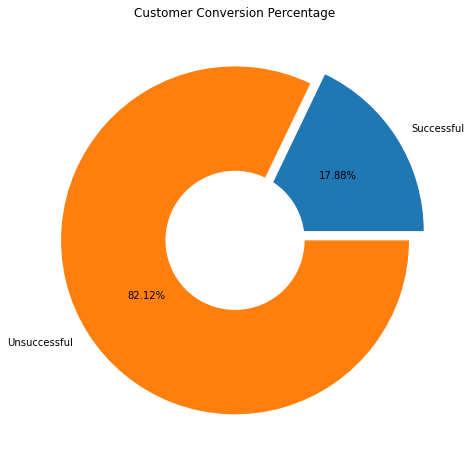

{'Successful': 64, 'Unsuccessful': 294}


In [124]:
# conversion table of lead stage
conversion_table = interaction[interaction["lead_stage"]=="conversion"]
conv_suc = {"Successful":conversion_table.shape[0], "Unsuccessful":basic_details.shape[0]-conversion_table.shape[0]}

plt.figure(figsize=(10,8))
plt.pie(x=conv_suc.values(), labels=conv_suc.keys(), explode=(0.1,0), autopct='%.2f%%')
plt.gca().add_artist(plt.Circle(xy=(0,0), radius=0.4, facecolor="white"))
plt.title("Customer Conversion Percentage")
plt.show()
print(conv_suc)

**64 out of 358 Customers have converted successfully into the course**

Text(0.5, 1.0, 'Successful Conversion leads by Junior Sales Managers')

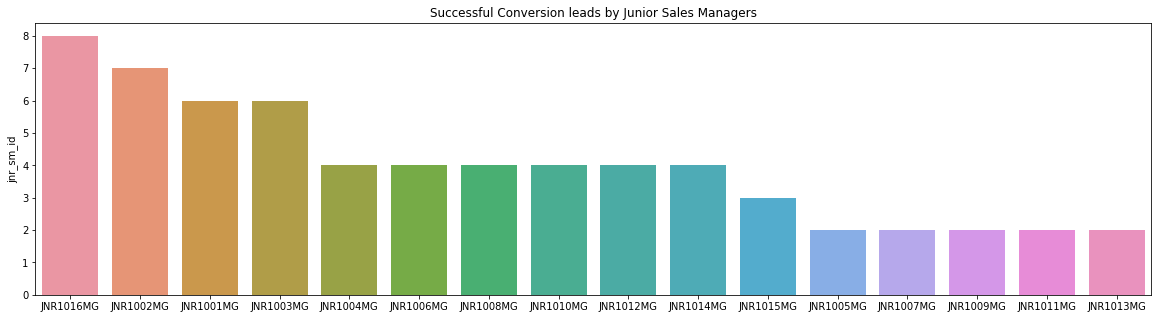

In [125]:
jnr_success_rate = interaction[interaction["lead_stage"]=="conversion"]["jnr_sm_id"].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(jnr_success_rate.index, jnr_success_rate)
plt.title("Successful Conversion leads by Junior Sales Managers")

**Total Successful leads by Junior Sales Managers**

In [127]:
lead_success = interaction[interaction["lead_stage"]=="lead"]["call_status"].value_counts()
lead_success

successful      1267
unsuccessful     280
Name: call_status, dtype: int64

In [177]:
# Merging basic_details and Interaction tables
basic_interaction_merge = basic_details.merge(interaction, on="lead_id", how="inner")

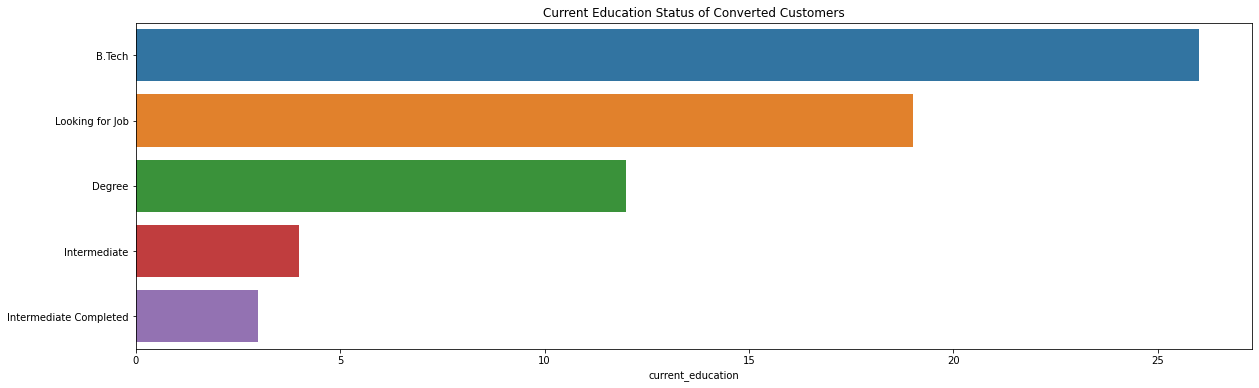

In [160]:
# Successful conversion table
success_conv = basic_interaction_merge[basic_interaction_merge["lead_stage"]=="conversion"].copy()
edu_conv= success_conv["current_education"].value_counts()

# edu_gen = {}
# for i in edu_conv.index:
#   sumM=0
#   sumF=0
#   j=0
#   while j<success_conv.shape[0]:
#     if success_conv.iloc[j,2]=="MALE" and success_conv.iloc[j,4]==i:
#       sumM = sumM+1
#     elif success_conv.iloc[j,2]=="FEMALE" and success_conv.iloc[j,2]==i:
#       sumF = sumF+1
#     j = j+1
#   edu_gen[i] = [{"MALE":sumM},{"FEMALE":sumF}]

# print(edu_gen)
# plt.bar(x=edu_conv.index, height=edu_conv, )

plt.figure(figsize=(20,6))
sns.barplot(y=edu_conv.index, x=edu_conv)
plt.title("Current Education Status of Converted Customers")
plt.show()

In [161]:
# Merging reasons for no interest and Interaction tables
reasons_interaction_merge = reasons_for_no_interest.merge(interaction, on="lead_id", how="inner")
reasons_interaction_merge.shape

(1555, 9)

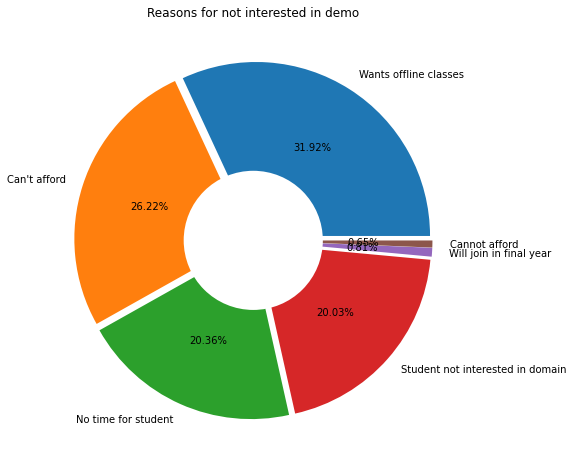

Wants offline classes               196
Can't afford                        161
No time for student                 125
Student not interested in domain    123
Will join in final year               5
Cannot afford                         4
Name: reasons_for_not_interested_in_demo, dtype: int64


In [168]:
rd = reasons_interaction_merge["reasons_for_not_interested_in_demo"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(x=rd, labels=rd.index, explode=(0.03,0.03,0.03,0.03,0.03,0.03), autopct='%.2f%%')
plt.gca().add_artist(plt.Circle(xy=(0,0), radius=0.4, facecolor="white"))
plt.title("Reasons for not interested in demo")
plt.show()
print(rd)

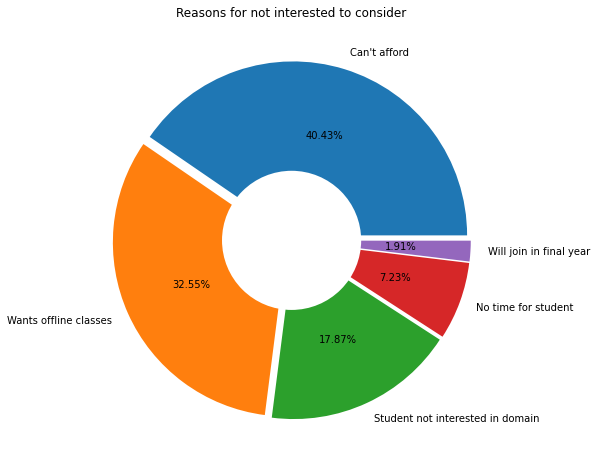

Can't afford                        190
Wants offline classes               153
Student not interested in domain     84
No time for student                  34
Will join in final year               9
Name: reasons_for_not_interested_to_consider, dtype: int64


In [176]:
rcs = reasons_interaction_merge["reasons_for_not_interested_to_consider"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(x=rcs, labels=rcs.index, explode=(0.03,0.03,0.03,0.03,0.03), autopct='%.2f%%')
plt.gca().add_artist(plt.Circle(xy=(0,0), radius=0.4, facecolor="white"))
plt.title("Reasons for not interested to consider")
plt.show()
print(rcs)

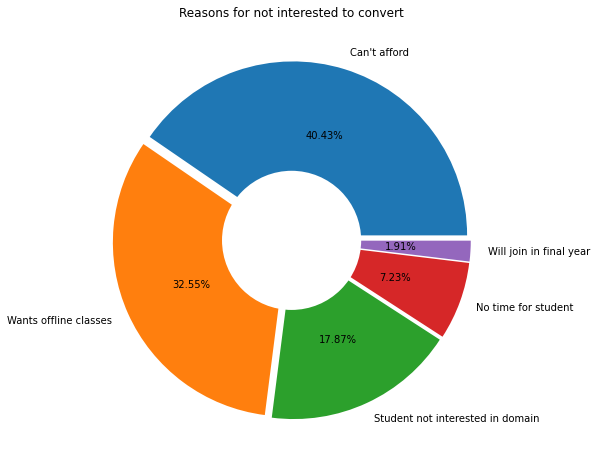

Can't afford                        190
Wants offline classes               153
Student not interested in domain     84
No time for student                  34
Will join in final year               9
Name: reasons_for_not_interested_to_consider, dtype: int64


In [175]:
rcn = reasons_interaction_merge["reasons_for_not_interested_to_consider"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(x=rcn, labels=rcn.index, explode=(0.03,0.03,0.03,0.03,0.03), autopct='%.2f%%')
plt.gca().add_artist(plt.Circle(xy=(0,0), radius=0.4, facecolor="white"))
plt.title("Reasons for not interested to convert")
plt.show()
print(rcn)

Summary:
1. There are mainly two reasons for not considering course which are   a. **Wants offline classes**   &  b. **Cannot afford course**
2.  Majority of Successful conversion of the course customers are in either **B. Tech** or **Degree** course or they are **Looking for jobs**.

From the insights we got we can say that we should take **Offline Classes** and **reduce fees** for the course and we should persue for the users who are **graduated** and **looking for jobs**.

Tableau Dashboard Link:

https://public.tableau.com/views/CustomerAcquisitionfinal/Dashboard3?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link